# Liczba zgonów podzielona przez liczbę zakażeń dla różnych krajów

Patrz owid02.ipynb: Liczba hospitalizacji podzielona przez liczbę zakażeń dla różnych krajów - problemy:
1. Trudno wybrać przesunięcie hospitalizacji względem przypadków, bo dla różnych krajów i różnych okresów są różne.
2. Skoro Radek mówi, że hospitalizacje covidowe to nie to samo, co choroba na covid, może lepiej zamiast hospitalizacji dać zgony



In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from share.helper_functions import set_legend_right


In [5]:
url_cases = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
url_deaths = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths.csv"

df_cases=pd.read_csv(url_cases)
df_deaths=pd.read_csv(url_deaths)

In [41]:
countries = [
    'Poland',
    'Denmark',
    'United Kingdom',
    'United States'
    ]


In [45]:
dfc = {}
indicator = 'Cases'
for country in countries:
    dfc[country] = pd.DataFrame

    dfc[country] = df_cases[['date', country]].copy(deep=True)
    dfc[country]['date'] = pd.to_datetime(dfc[country]['date'], format = "%Y-%m-%d")

    dfc[country].index = dfc[country]['date']
    dfc[country].index.name = 'Date'
    dfc[country].drop('date', axis = 1 , inplace=True)
    dfc[country].rename({country:indicator}, axis=1, inplace=True)
    dfc[country]= dfc[country].apply(pd.to_numeric)
    # display(country, dfc[country])

dfd = {}
indicator = 'Deaths'
for country in countries:
    dfd[country] = pd.DataFrame

    dfd[country] = df_deaths[['date', country]].copy(deep=True)
    dfd[country]['date'] = pd.to_datetime(dfd[country]['date'], format = "%Y-%m-%d")

    dfd[country].index = dfd[country]['date']
    dfd[country].index.name = 'Date'
    dfd[country].drop('date', axis = 1 , inplace=True)
    dfd[country].rename({country:indicator}, axis=1, inplace=True)
    dfd[country]= dfd[country].apply(pd.to_numeric)    
    # display(country, dfd[country])

df = {}
for country in countries:
    df[country] = pd.DataFrame
    df[country] = pd.concat([dfc[country], dfd[country]], axis=1)
    # display(df[country])

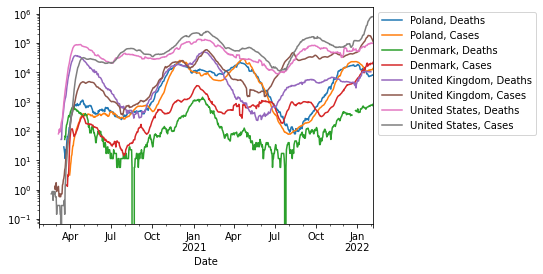

In [58]:
shift = 21

fig, ax = plt.subplots()
for country in countries:

    (df[country]['Deaths'].rolling(7).mean() *40).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

Dofitować przesunięcia dla krajów. Czy dla wszystkich wyjdą takie same?
Ale dofitować dopiero w skali logarytmicznej... Ale wtedy są problemy z zerami...

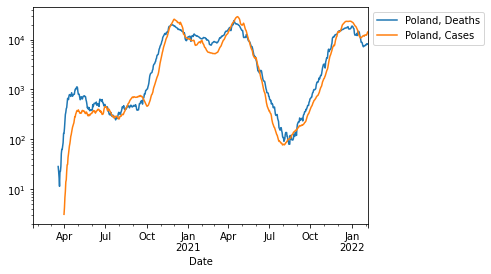

In [59]:
shift = 21

fig, ax = plt.subplots()
for country in ['Poland']:

    (df[country]['Deaths'].rolling(7).mean() *40).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

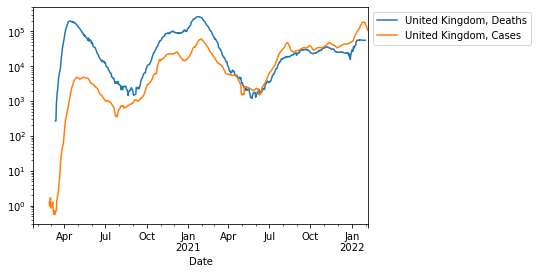

In [69]:
shift = 21

fig, ax = plt.subplots()
for country in ['United Kingdom']:

    (df[country]['Deaths'].rolling(7).mean() *210).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

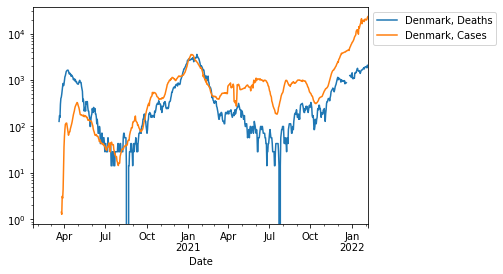

In [62]:
shift = 21

fig, ax = plt.subplots()
for country in ['Denmark']:

    (df[country]['Deaths'].rolling(7).mean() *100).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

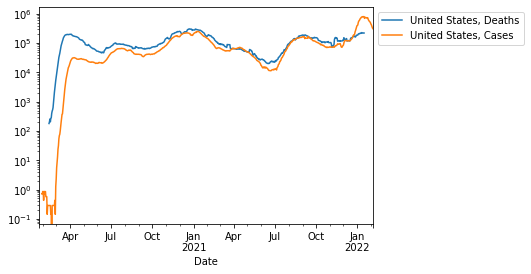

In [74]:
shift = 21

fig, ax = plt.subplots()
for country in ['United States']:

    (df[country]['Deaths'].rolling(7).mean() *90).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

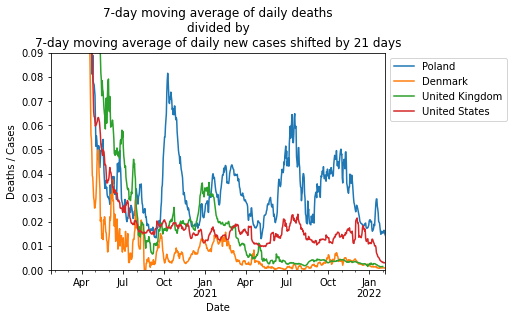

In [85]:
shift = 21

fig, ax = plt.subplots()
for country in countries:

    # (df[country]['Deaths'].rolling(7).mean() *40).plot(ax=ax, label=country+', Deaths',\
        #  logy=True) 
    # df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    df1 = df[country]['Deaths'].rolling(7).mean()  / df[country]['Cases'].shift(shift).rolling(7).mean() 
    df1.plot(ax=ax, label=country) 
    
ax.set_title('7-day moving average of daily deaths\ndivided by\n7-day moving average of daily new cases shifted by 21 days')
ax.set_ylabel('Deaths / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.set_ylim(0,0.09)
ax.legend(**legendparams);

Dlaczego na początku takie duże wartości?

In [82]:
# # To źle wygląda, są przerwy
# shift = 21

# fig, ax = plt.subplots()
# for country in countries:
#     df1 = (df[country]['Deaths']  / df[country]['Cases']).shift(shift).rolling(7).mean() 
#     df1.plot(ax=ax, label=country) 
    
# ax.set_title('7-day moving average of daily deaths\ndivided by\n7-day moving average of daily new cases')
# ax.set_ylabel('Deaths / Cases')
# legendparams = {} #{'labels':countries}
# legendparams = set_legend_right(legendparams)
# ax.set_ylim(0,0.1)
# ax.legend(**legendparams);

In [164]:
from scipy.optimize import curve_fit, fmin
import numpy as np

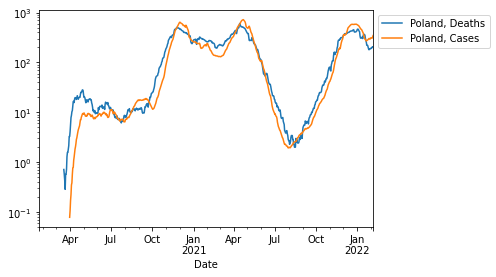

In [88]:
shift = 21
factor = 0.025

# def f(shift, factor, country):
    


fig, ax = plt.subplots()
for country in ['Poland']:

    df[country]['Deaths'].rolling(7).mean().plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    (df[country]['Cases'].rolling(7).mean().shift(shift)*factor).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

In [133]:
df[country]['Deaths'].rolling(7).mean().fillna(0)[0]

0.0

In [230]:
def f(x,shift,factor):
    print("Type of x: ", type(x), "x=",x)
    x=x[0]
    print("Type of x: ", type(x), "x=",x)
    y = df['Poland']['Cases'].rolling(7).mean().shift(np.int(shift)).fillna(0.)[np.int(x)]*np.float(factor)
    y = np.array(y)
    print("Type of y: ",type(y))
    return y
# print(f(0.,21.,0.025))
# print(f(746.,21.,0.025))
# type(f(746.,21.,0.025))


In [231]:
xmax = df[country]['Deaths'].rolling(7).mean().size -1
# print(xmax)
xdata = np.linspace(start=0, stop=xmax, num=xmax+1)
print(xdata[0]) 
print(xdata[xmax])
ydata = df[country]['Deaths'].rolling(7).mean().fillna(0.).to_numpy()
print(ydata[0]) 
print(ydata[xmax])

0.0
746.0
0.0
205.14285714285714


In [232]:
shift = 21.
factor = 0.025
pars, cov = curve_fit(f=f, xdata=xdata, ydata=ydata, p0=[shift, factor], bounds=(-np.inf, np.inf))

Type of x:  <class 'numpy.ndarray'> x= [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 18

# Zrobić tak, żeby x podawane do f() jako ndarray było poprawnie konwertowane na int. Bo f() to ma być funkcja zwracająca tablicę!!!

In [229]:
pars

array([21.   ,  0.025])